In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('african_crises.csv')

In [3]:
df.head(10)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
5,1,DZA,Algeria,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,no_crisis
6,1,DZA,Algeria,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,no_crisis
7,1,DZA,Algeria,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,no_crisis
8,1,DZA,Algeria,1878,0,0.051948,0,0,0.0,-1.492537,0,0,0,no_crisis
9,1,DZA,Algeria,1879,0,0.052029,0,0,0.0,-16.831357,0,0,0,no_crisis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 115.9+ KB


In [5]:
df[pd.isnull(df).any(axis=1)]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis


In [6]:
print(f'If we drop rows with at least one value missing, we get {df.dropna().shape[0]:,} \
out of {df.shape[0]:,} instances.')

If we drop rows with at least one value missing, we get 1,059 out of 1,059 instances.


In [7]:
#cardinality - we have a lot of 0,1 values but none of the numeric ones needs to be converted into categorical, 
#just categorical banking_crisis into numerical variables 
df.nunique().sort_values()

systemic_crisis                       2
domestic_debt_in_default              2
sovereign_external_debt_default       2
independence                          2
inflation_crises                      2
banking_crisis                        2
currency_crises                       3
gdp_weighted_default                  6
case                                 13
cc3                                  13
country                              13
year                                155
exch_usd                            772
inflation_annual_cpi               1022
dtype: int64

In [8]:
df['banking_crisis'] = df['banking_crisis'] .apply(lambda x: 1 if x == 'crisis' else 0)

In [9]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


In [10]:
cols_boxplot = ['exch_usd','inflation_annual_cpi']
df[cols_boxplot].describe()

,exch_usd,inflation_annual_cpi
count,1059.000000,1.059000e+03
mean,43.140831,2.084889e+04
std,111.475380,6.757274e+05
min,0.000000,-2.850214e+01
25%,0.195350,2.086162e+00
50%,0.868400,5.762330e+00
75%,8.462750,1.164405e+01
max,744.306139,2.198970e+07


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


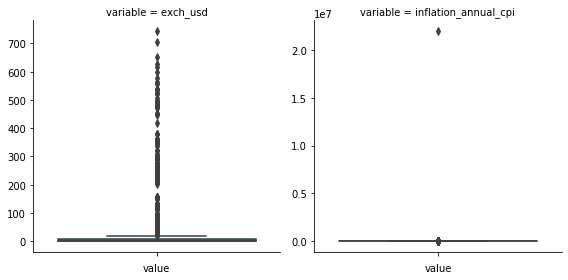

In [11]:
a = pd.melt(df[cols_boxplot + ['year', 'country']], id_vars = ['year', 'country'], value_vars=cols_boxplot)
b = sns.FacetGrid(a, col = 'variable', sharex=False, sharey=False, size=4)
b.map(sns.boxplot, 'value', orient='v')

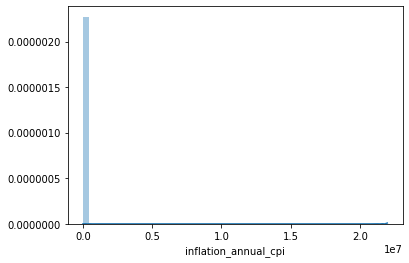

In [12]:
sns.distplot(df['inflation_annual_cpi'])

In [13]:
q1 = df[cols_boxplot].quantile(0.25)
q3 = df[cols_boxplot].quantile(0.75)
iqr = q3 - q1

df[cols_boxplot] = df[cols_boxplot].clip(q1 - 1.5*iqr, q3 + 1.5*iqr, axis=1)
df[cols_boxplot].describe()

,exch_usd,inflation_annual_cpi
count,1059.000000,1059.000000
mean,6.056483,7.596038
std,8.107415,8.773476
min,0.000000,-12.250666
25%,0.195350,2.086162
50%,0.868400,5.762330
75%,8.462750,11.644048
max,20.863850,25.980876


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


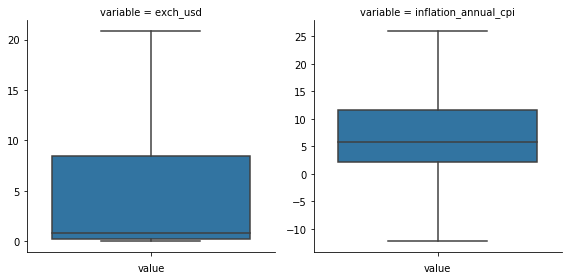

In [14]:
#fixed distributions
a = pd.melt(df[cols_boxplot + ['year', 'country']], id_vars = ['year', 'country'], value_vars=cols_boxplot)
b = sns.FacetGrid(a, col = 'variable', sharex=False, sharey=False, size=4)
b.map(sns.boxplot, 'value', orient='v')

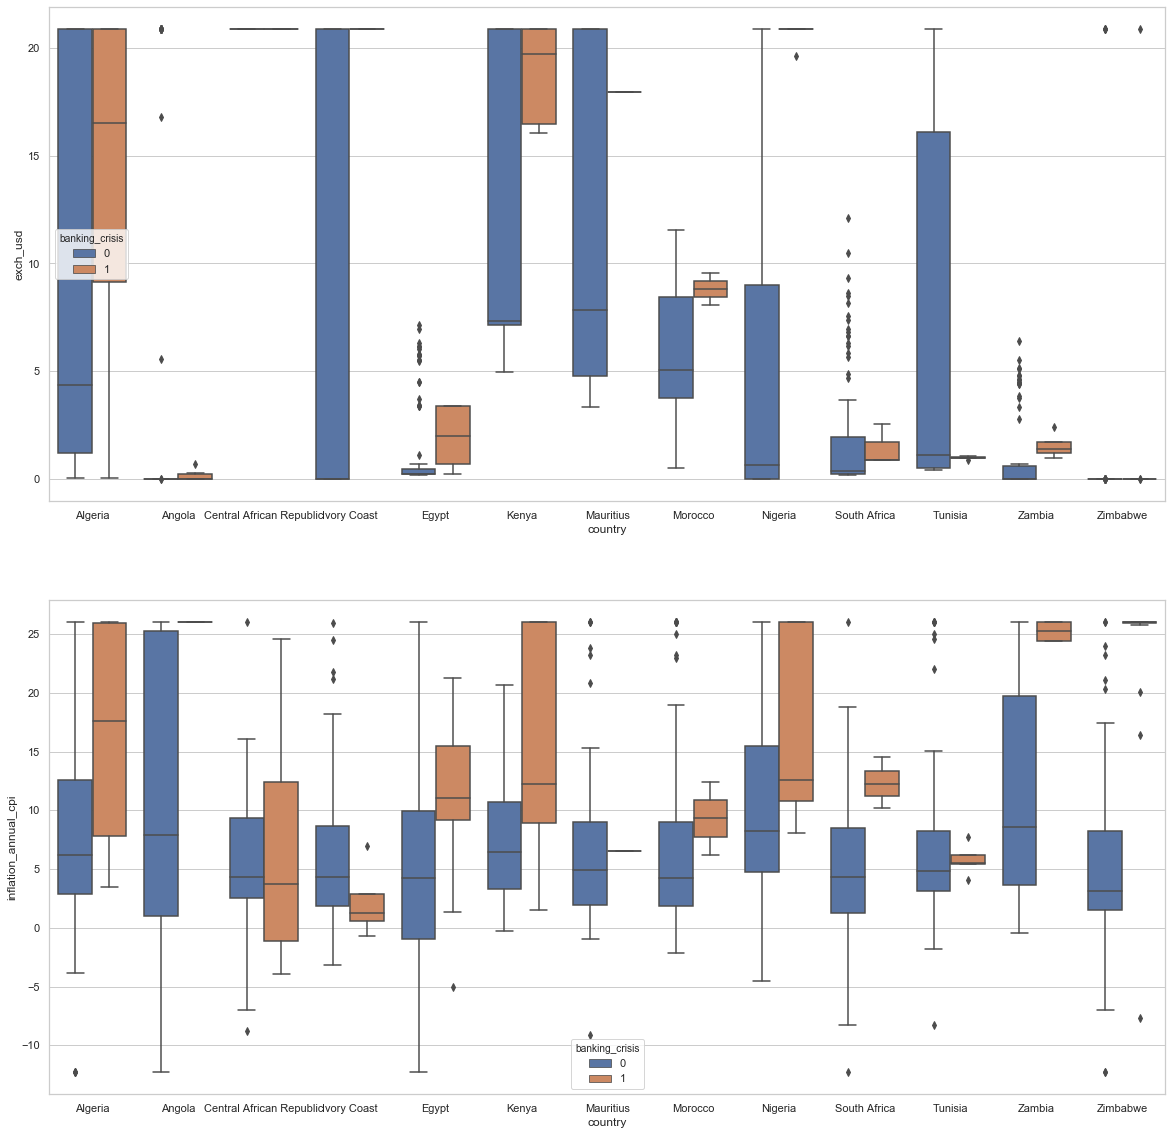

In [15]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count = 1

for i in cols_boxplot:
    plt.subplot(2,1,count)
    count += 1
    sns.boxplot(x = df['country'], y = df[i], hue = df['banking_crisis'])

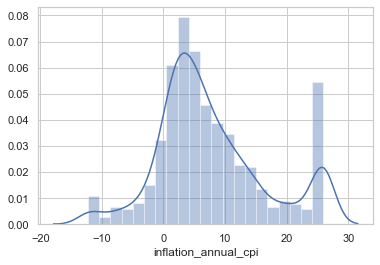

In [16]:
sns.distplot(df['inflation_annual_cpi'])

In [17]:
df.groupby(['country', 'banking_crisis']).size().sort_values(ascending=False)

country                   banking_crisis
Egypt                     0                 144
South Africa              0                 111
Algeria                   0                  81
Zimbabwe                  0                  75
Morocco                   0                  73
Angola                    0                  70
Tunisia                   0                  70
Zambia                    0                  68
Mauritius                 0                  67
Ivory Coast               0                  59
Kenya                     0                  59
Nigeria                   0                  49
Central African Republic  0                  39
                          1                  19
Zimbabwe                  1                  15
Nigeria                   1                  11
Egypt                     1                  11
Kenya                     1                   8
Angola                    1                   7
Tunisia                   1                   5

In [18]:
individual_countries = list(df['country'].unique())

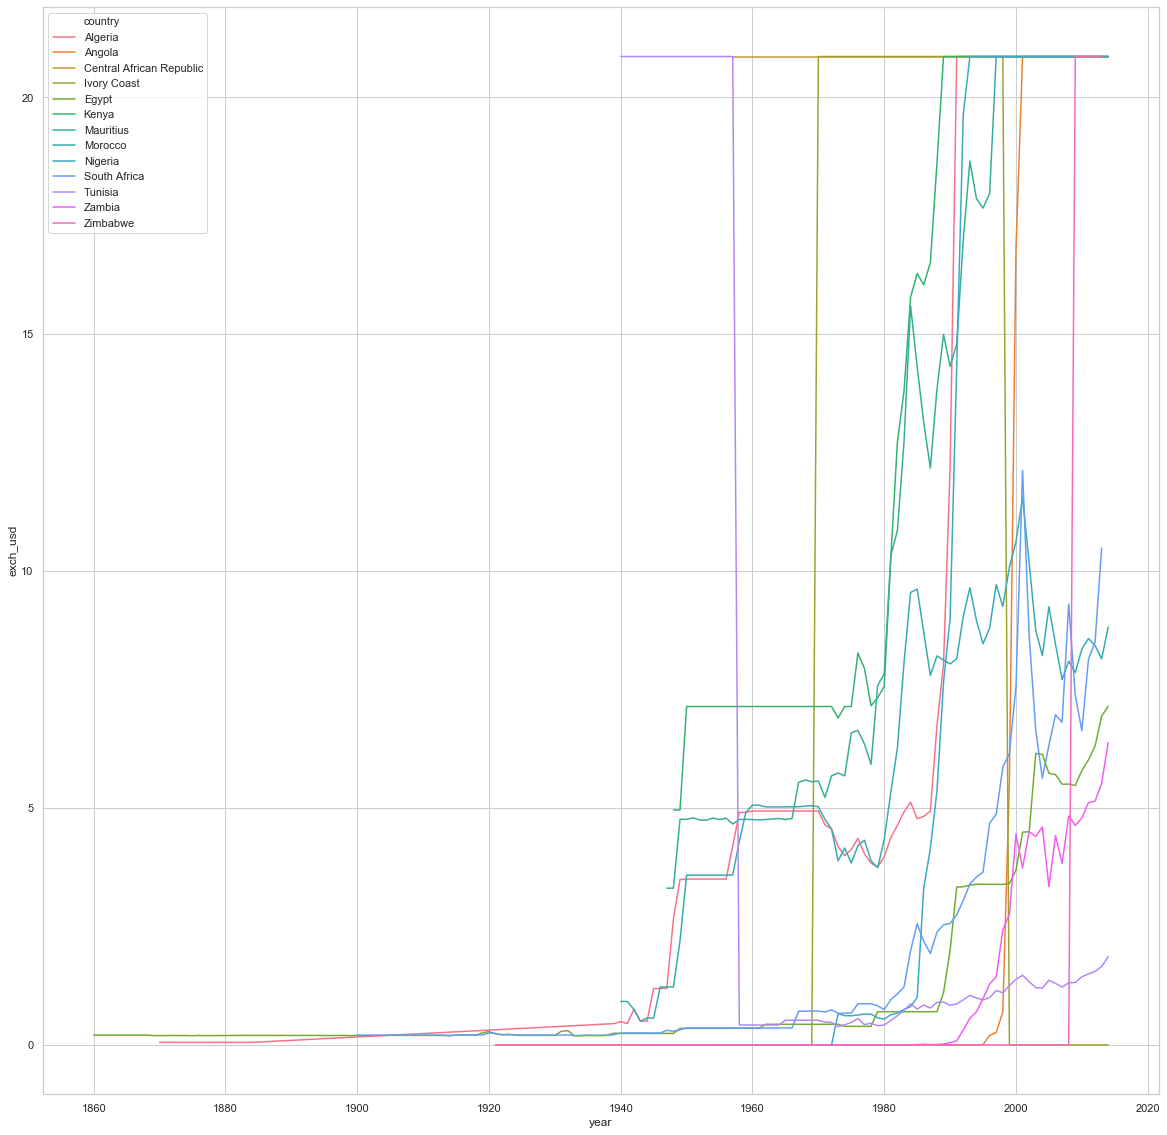

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
sns.lineplot(x = 'year', y = 'exch_usd', hue = 'country', data = df)

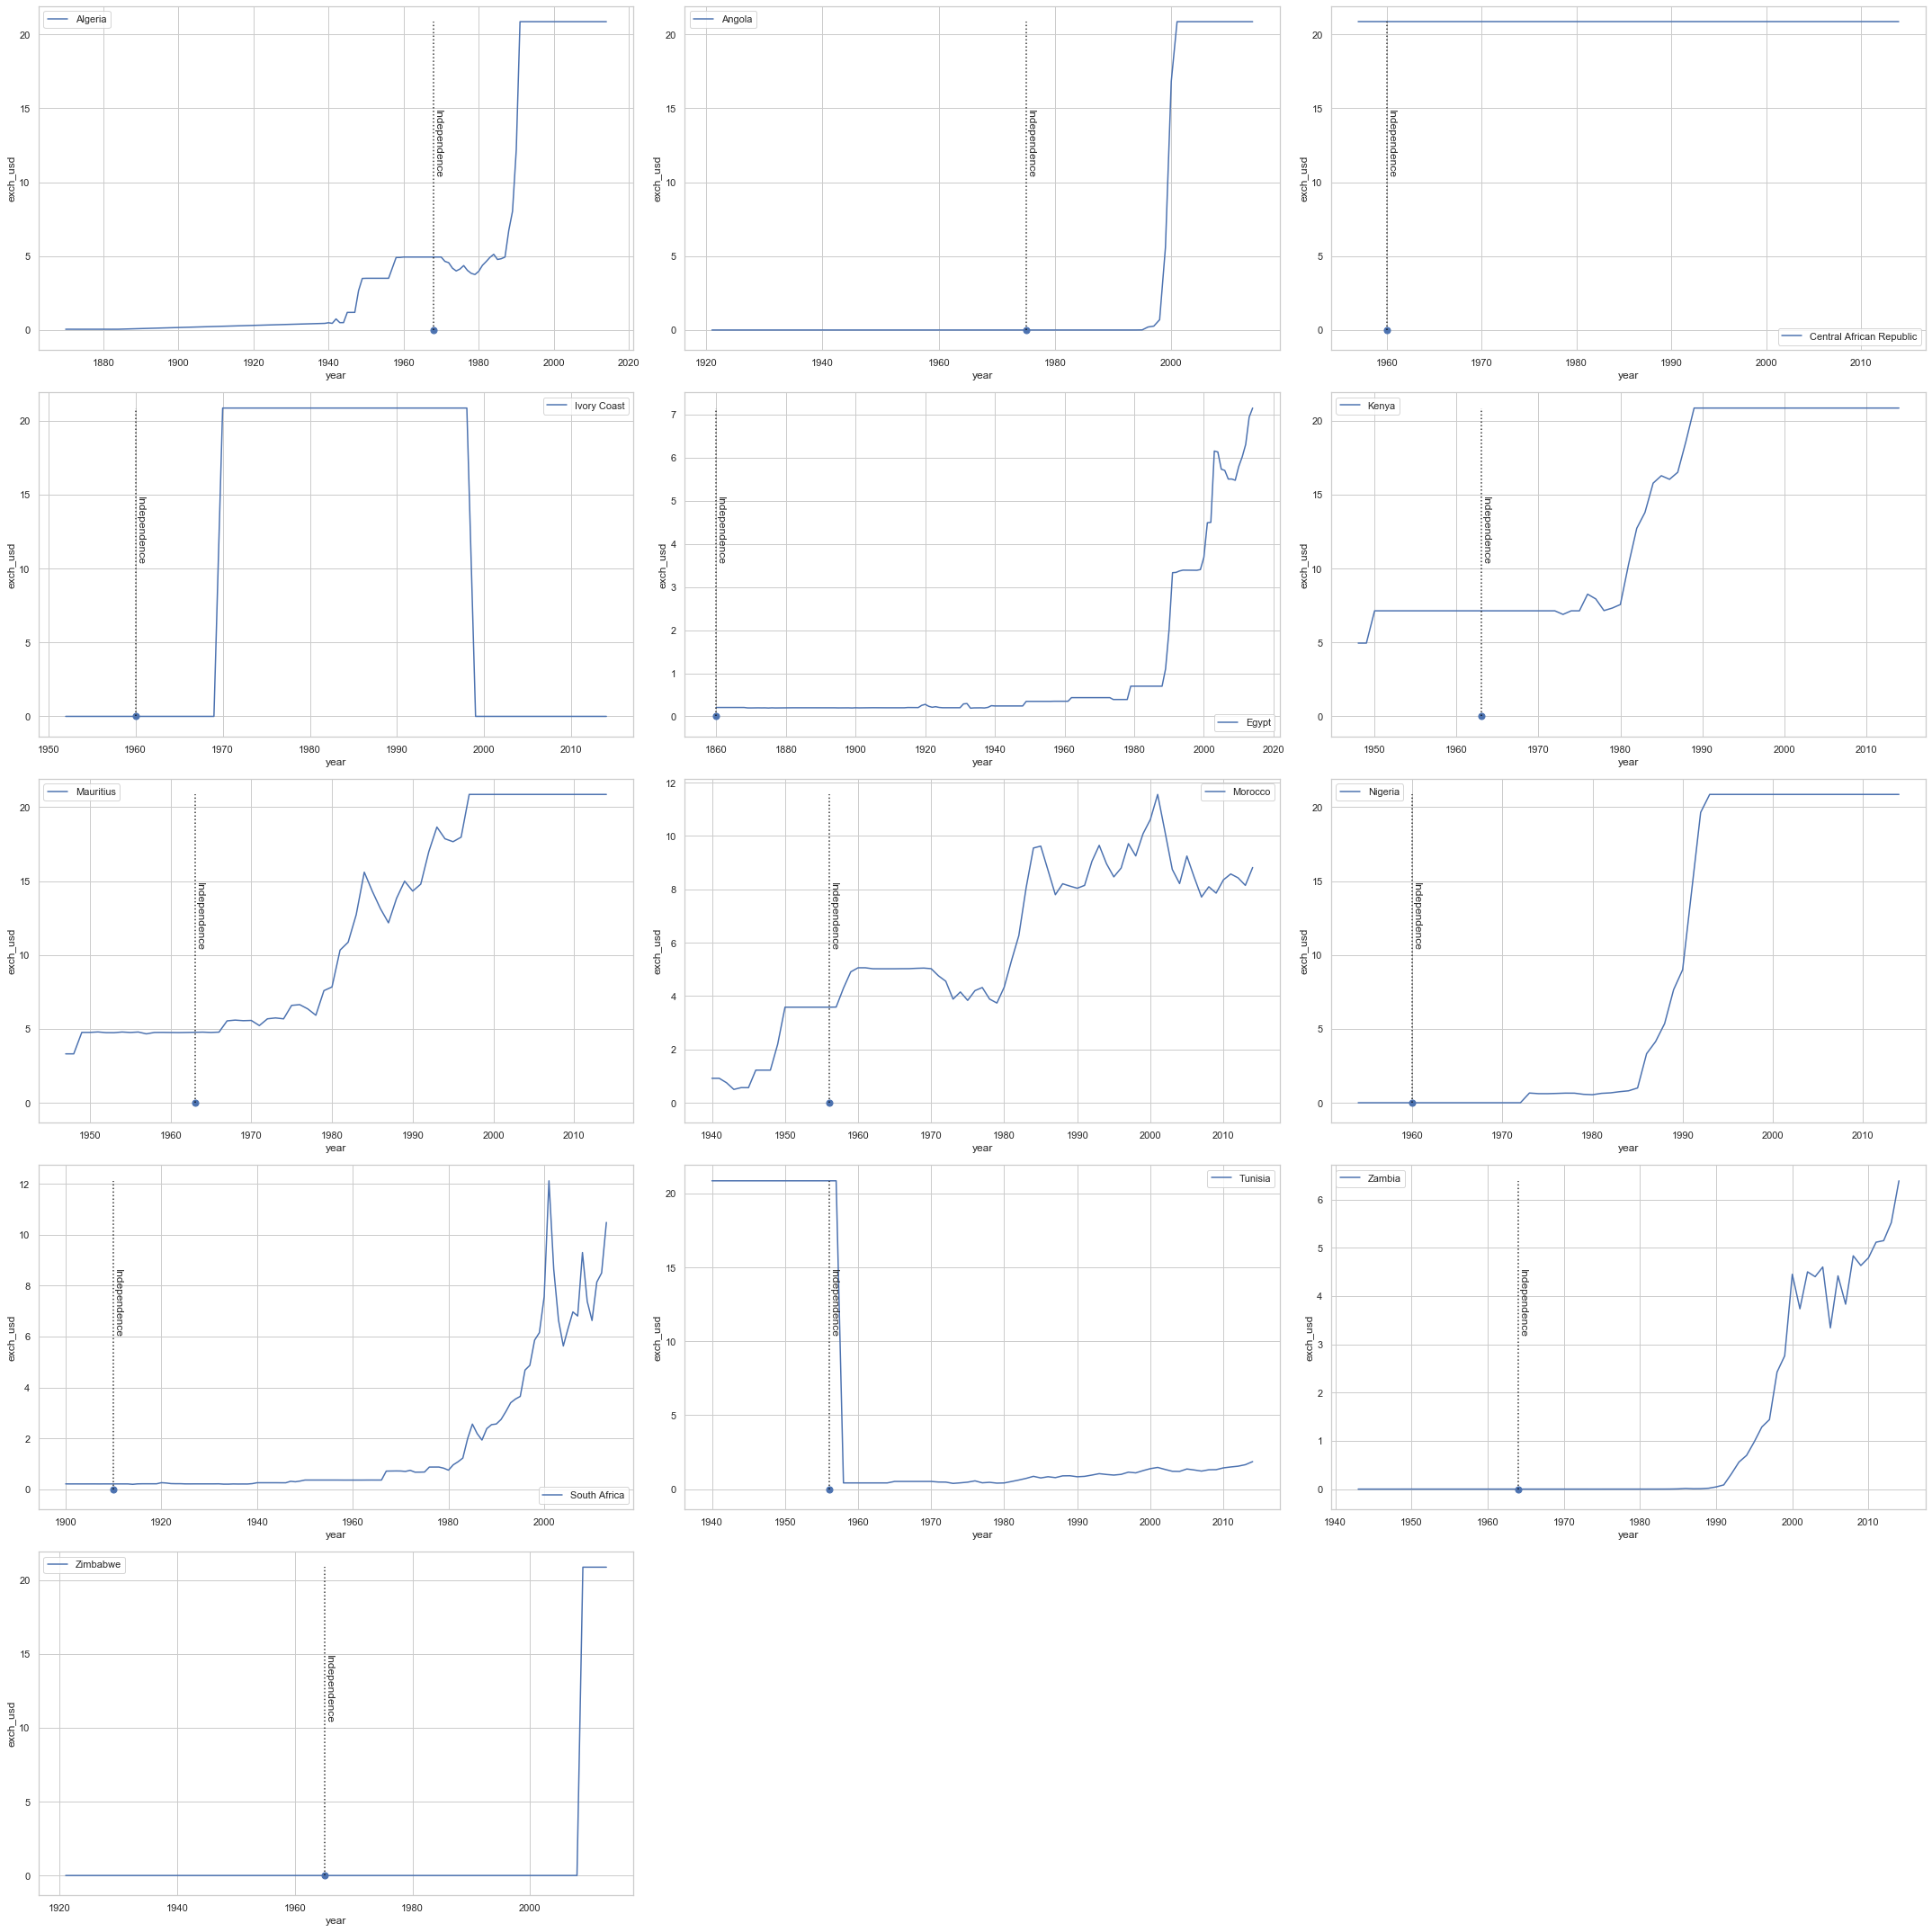

In [75]:
sns.set(style='whitegrid')
plt.figure(figsize=(30,30))
count = 1

for country in individual_countries:
    plt.subplot(5,3,count)
    count+=1
    
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['exch_usd'],
                 label=country)
                 
  
    plt.plot([np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
              np.min(df[np.logical_and(df.country==country,df.independence==1)]['year'])],
             [0,
              np.max(df[df.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),np.max(df[df.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)

    
    plt.scatter(x=np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
                y=0,
                s=50)
   
plt.tight_layout()
    


In [74]:
sns.set(style='whitegrid')
plt.figure(figsize=(30,30))
count = 1

for country in individual_countries:
    plt.subplot(5,3,count)
    count+=1
    
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['exch_usd'],
                 label=country               

            
    for crisis in individual_countries:
        plt.plot([(df[np.logical_and(df.country==country,df.banking_crisis==1)]['year']),
                  (df[np.logical_and(df.country==country,df.banking_crisis==1)]['year'])],
                 [0,
                  np.max(df[df.country==country]['exch_usd'])],
                 color='black',
                 linestyle='dotted',
                alpha = 0.8)

    plt.text(np.min(df[np.logical_and(df.country==country,df.banking_crisis==1)]['year']),
             np.max(df[df.country==country]['exch_usd'])/2,'Crisis',rotation=-90)

    
    plt.scatter(x=np.min(df[np.logical_and(df.country==country,df.banking_crisis==1)]['year']),
                y=0,
                s=50)  

    


SyntaxError: invalid syntax (<ipython-input-74-7b6b0d5d1fb4>, line 14)

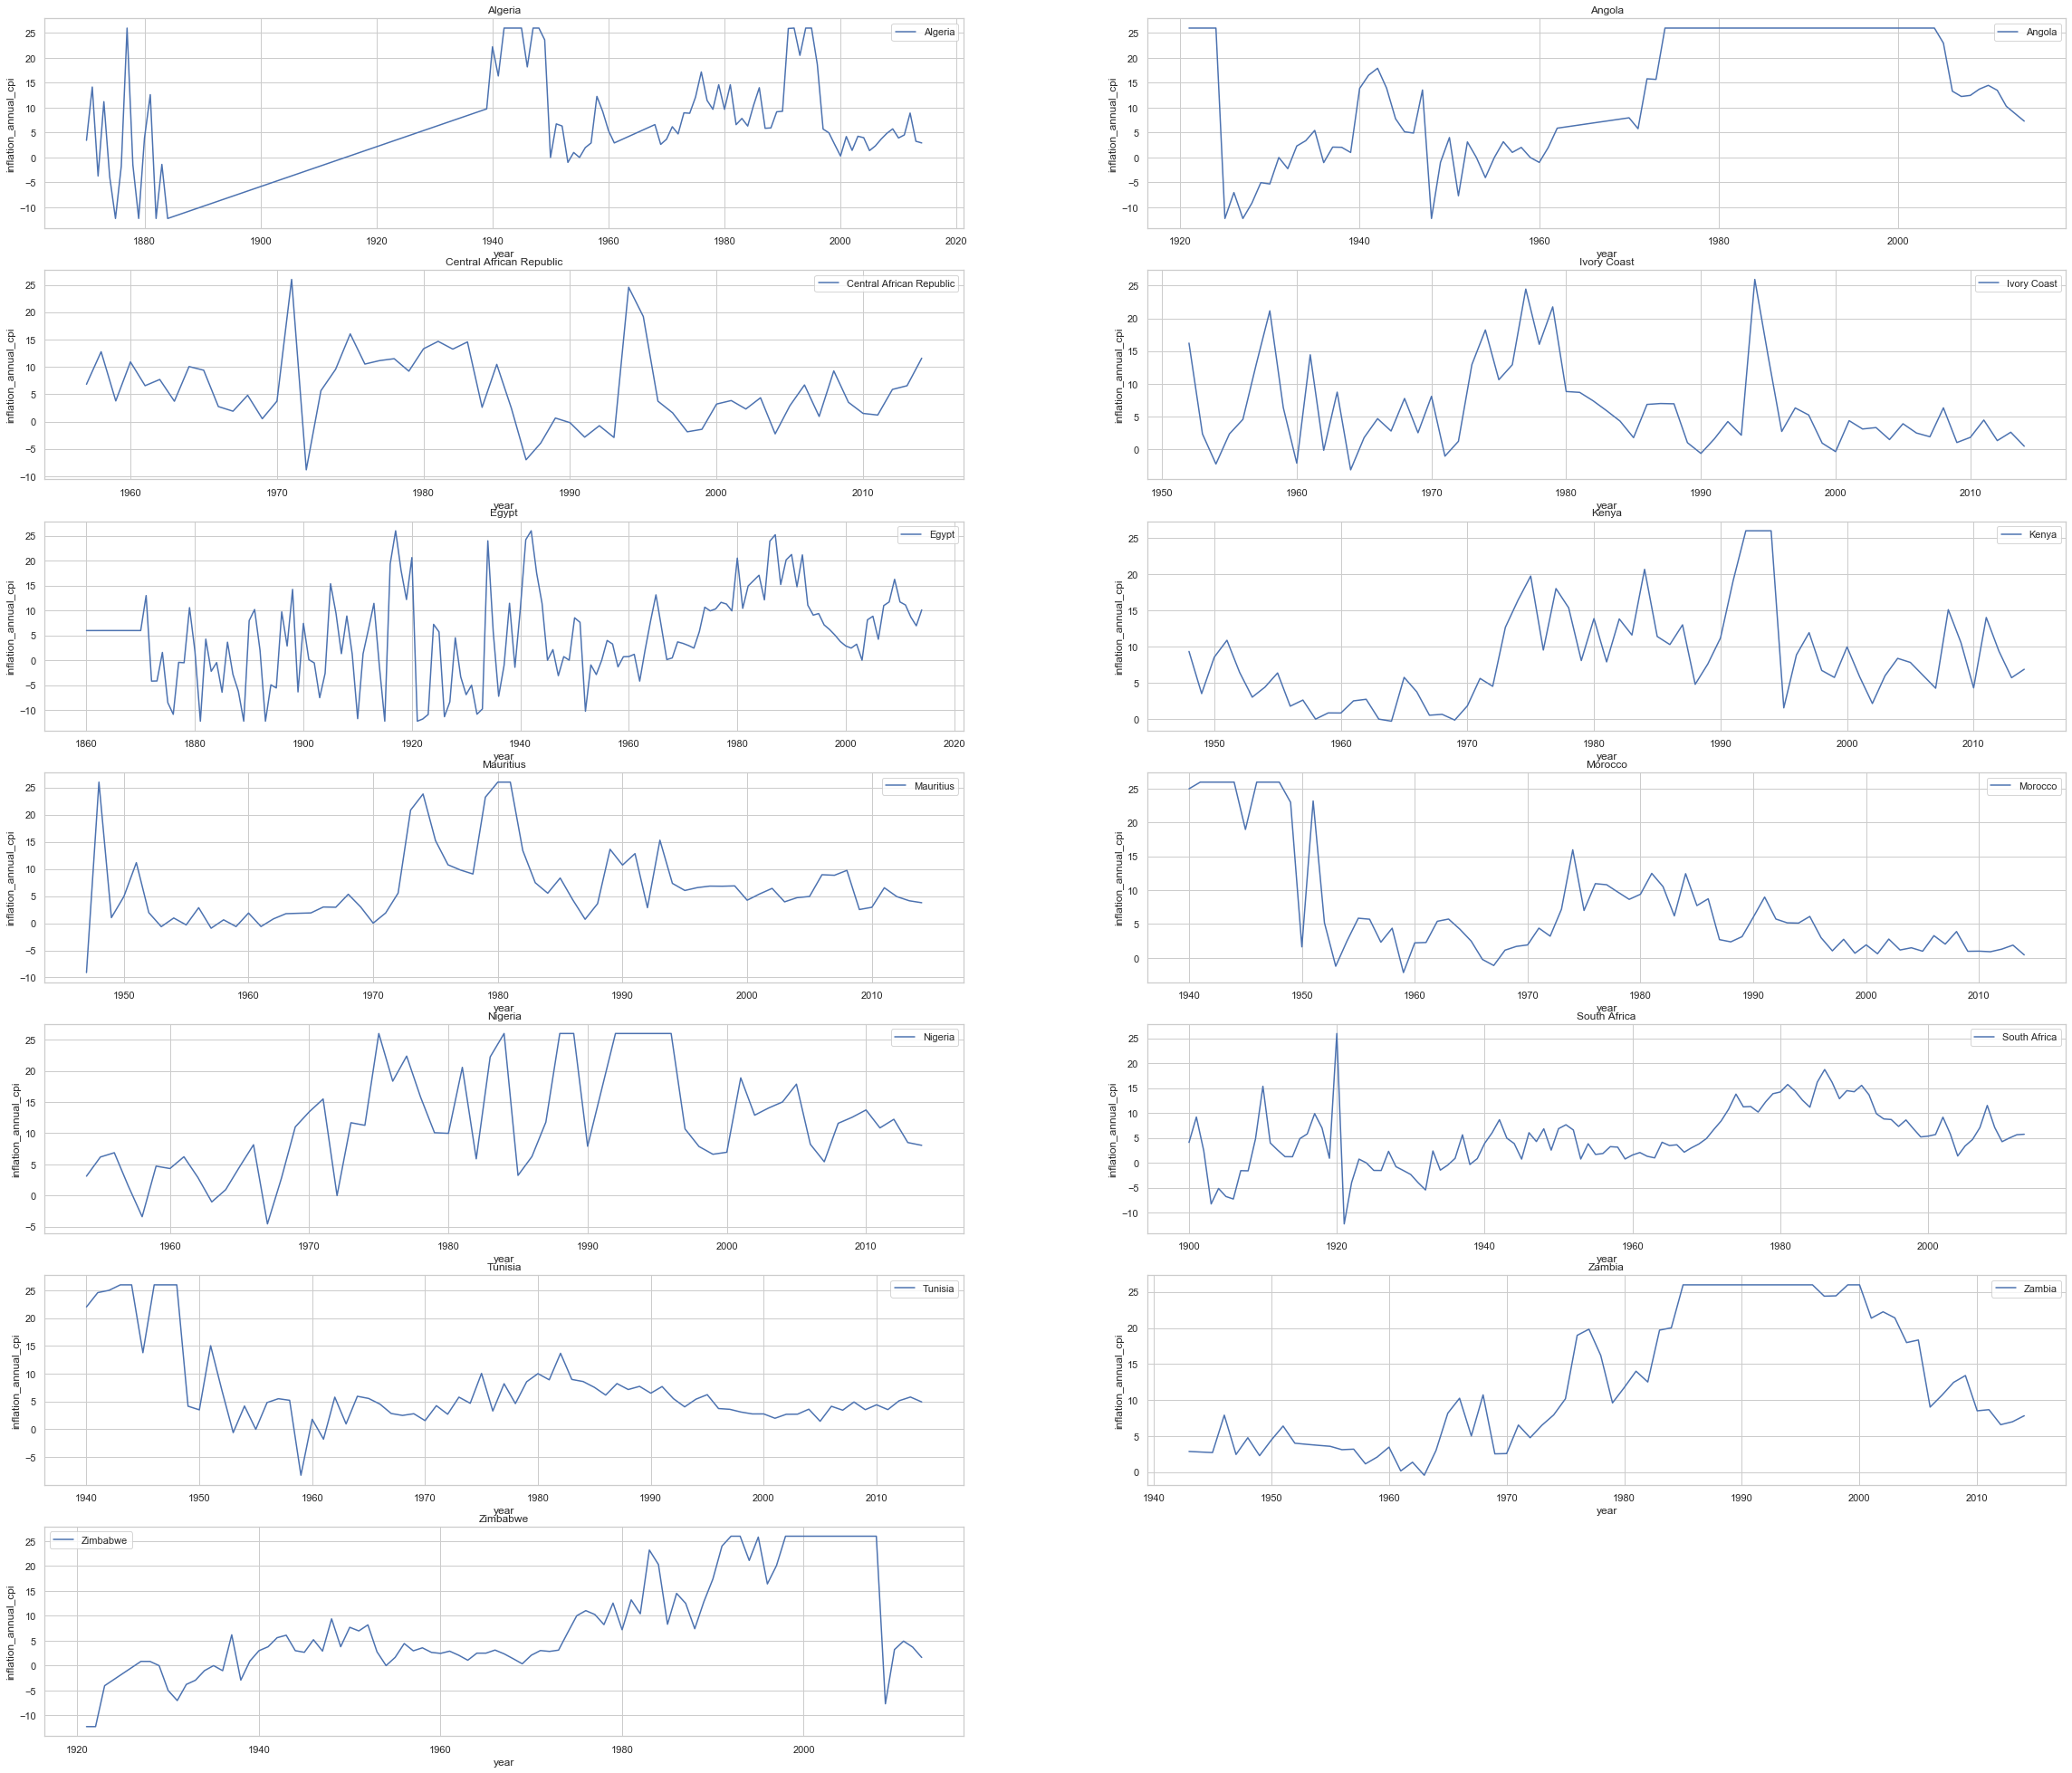

In [21]:
sns.set(style='whitegrid')
plt.figure(figsize=(40,40))
count = 1

for i in individual_countries:
    plt.subplot(8,2,count)
    count += 1
    sns.lineplot(df[df.country == i]['year'],
                 df[df.country == i]['inflation_annual_cpi'],
                label = i)
    plt.title(i)

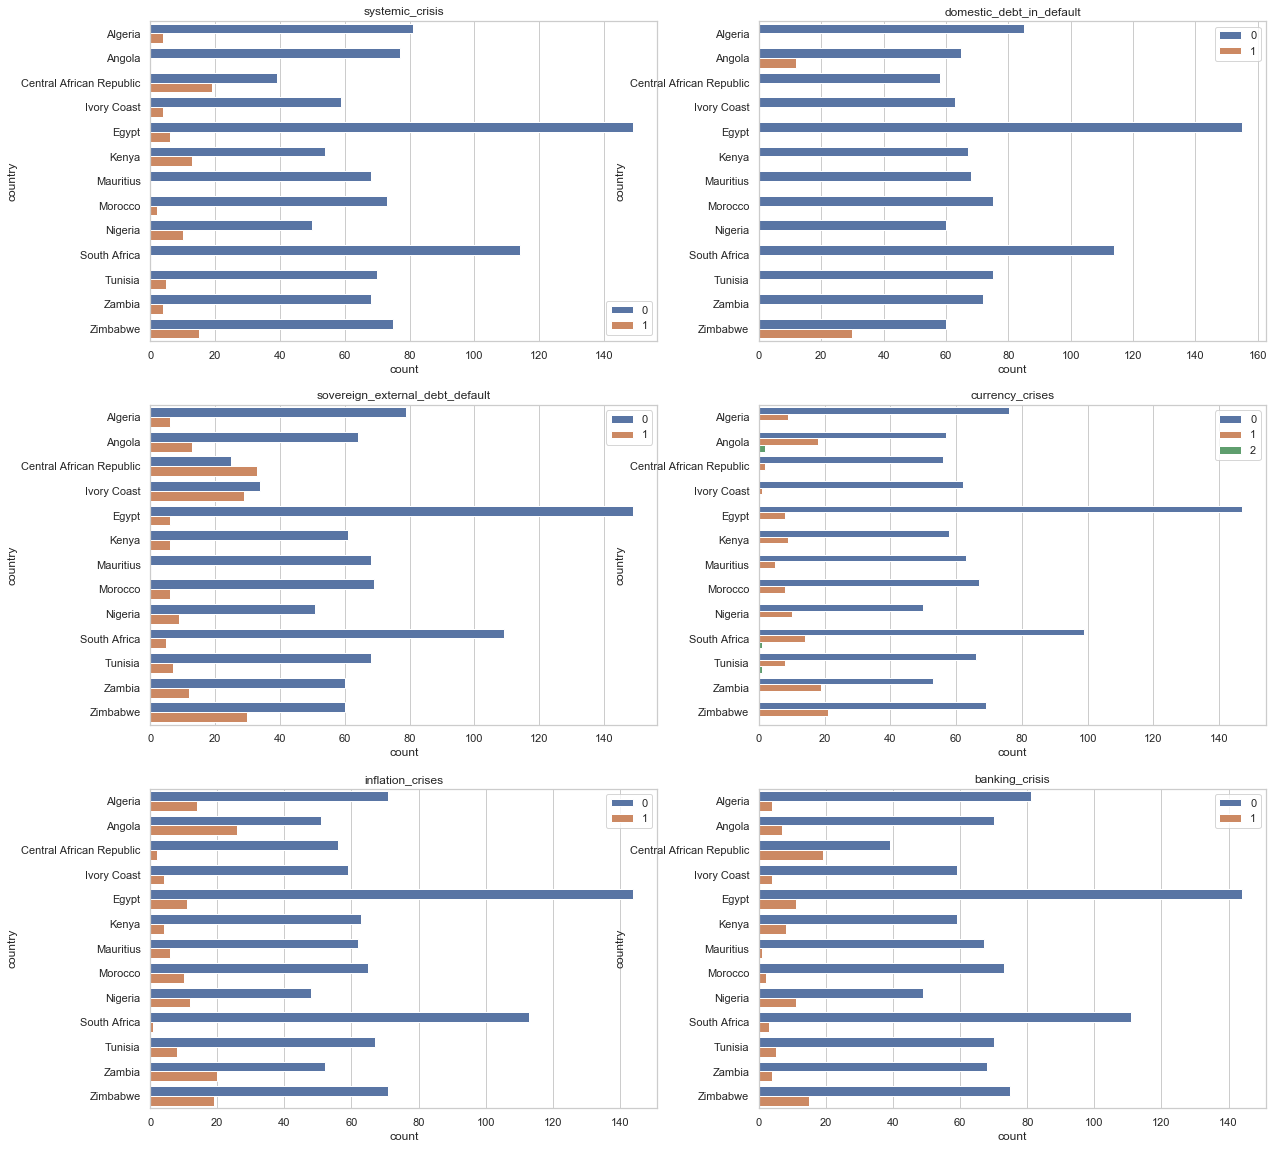

In [22]:
sns.set(style='whitegrid')
cols_countplot=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count = 1

for col in cols_countplot:
    plt.subplot(3,2,count)
    count+= 1
    sns.countplot(y='country', hue = col, data = df)
    plt.legend(loc = 0)
    plt.title(col)


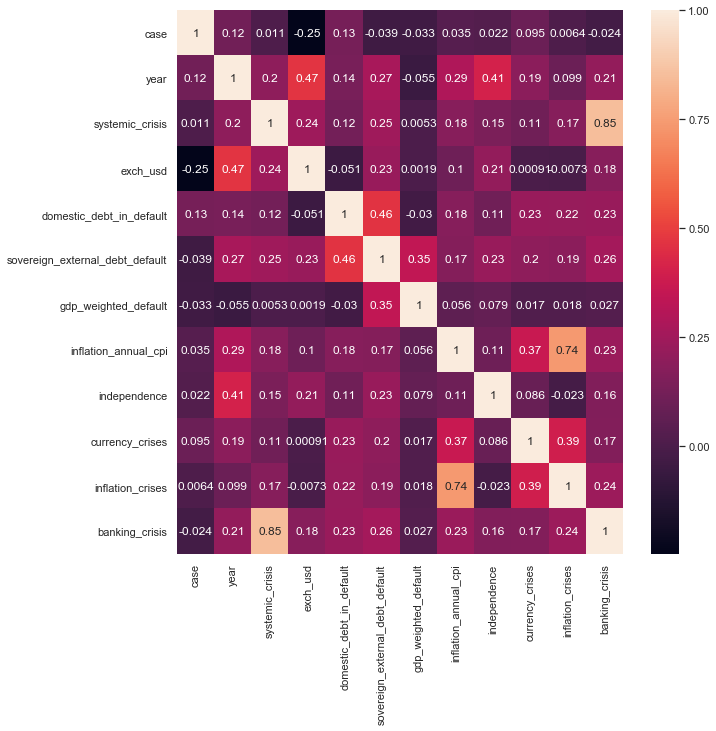

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

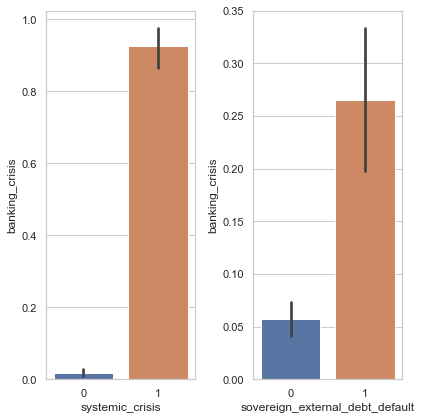

In [24]:
plt.figure(figsize=[6,6])
plt.subplot(121)
sns.barplot(x='systemic_crisis', y='banking_crisis', data=df)
plt.subplot(122)
sns.barplot(x='sovereign_external_debt_default', y='banking_crisis', data=df)
plt.tight_layout()

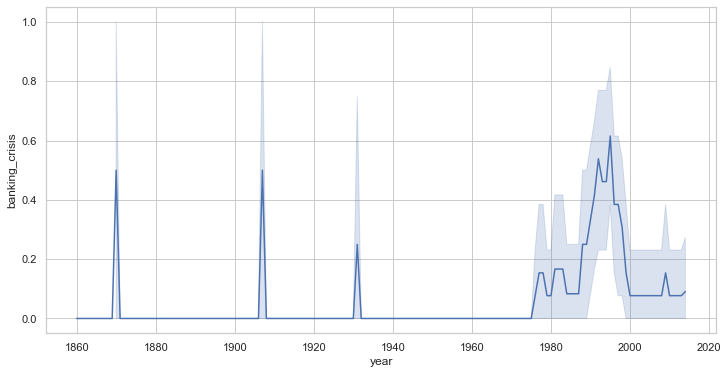

In [77]:
def_palette = sns.color_palette()
cat_palette = sns.color_palette("hls", 16)
fig, ax = plt.subplots(figsize = (12,6)) 
fig = sns.lineplot(x='year', y='banking_crisis', data=df, palette=cat_palette, ax=ax)
plt.title = 'Strength of crisis across African states'

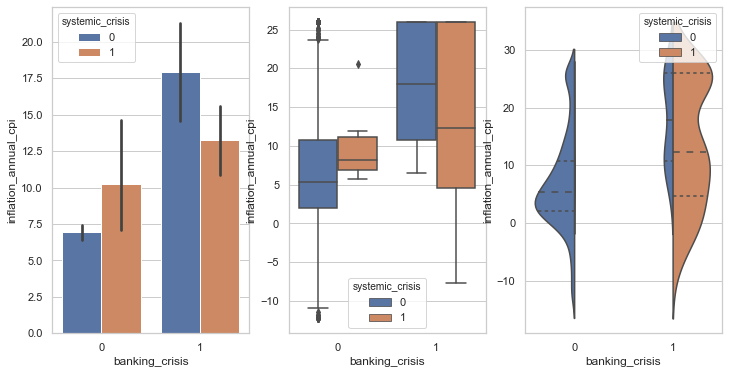

In [79]:
plt.figure(figsize=[12,6])
plt.subplot(131)
sns.barplot(x='banking_crisis', y='inflation_annual_cpi', hue='systemic_crisis', data=df);
plt.subplot(132)
sns.boxplot(x='banking_crisis', y='inflation_annual_cpi', hue='systemic_crisis', data=df);
plt.subplot(133)
sns.violinplot(x='banking_crisis', y='inflation_annual_cpi', hue='systemic_crisis', data=df, split=True, inner='quartile', scale='count');

In [ ]:
df.loc[df['banking_crisis'] == 1]

In [ ]:
#modelling part - logistic regression, decision trees and random forests, SVM